In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M1=np.loadtxt('./model1.dat')
z1=M1[:,0]
Da1=M1[:,1]
Dl1=M1[:,2]

M2=np.loadtxt('./model2.dat')
z2=M2[:,0]
Da2=M2[:,1]
Dl2=M2[:,2]

#10 pc in Mpc (1pc=1e-6Mpc)
pc=10
mpc=1e-6
pctompc=(pc*mpc)

print(z1)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]


In [3]:
#modulo de distancia

module1=5*np.log10(Dl1/pctompc)

module2=5*np.log10(Dl2/pctompc)


model1=np.savetxt('Module_distance1.dat',np.c_[z1,Da1,Dl1,module1],fmt='%2.2f',header=('z,Da,dL,DistanceModule'))

model2=np.savetxt('Module_distance2.dat',np.c_[z2,Da2,Dl2,module2],fmt='%2.2f',header=('z,Da,dL,DistanceModule'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


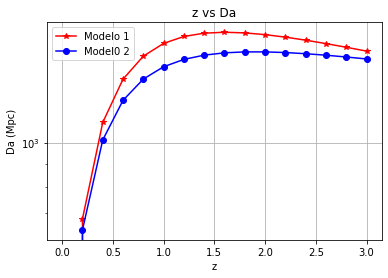

In [4]:
#graficas Da

plt.plot(z1,Da1,marker='*',label='Modelo 1',c='r')
plt.plot(z2,Da2,marker='o',label='Model0 2',c='b')
plt.title('z vs Da')
plt.xlabel('z')
plt.yscale('log')
plt.ylabel('Da (Mpc)')
plt.legend()
plt.grid()

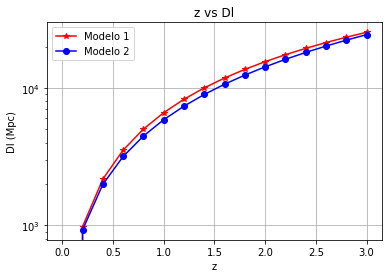

In [5]:
#graficas Dl

plt.plot(z1,Dl1,marker='*',label='Modelo 1',c='r')
plt.plot(z2,Dl2,marker='o',label='Modelo 2',c='b')
plt.title('z vs Dl')
plt.xlabel('z')
plt.yscale('log')
plt.ylabel('Dl (Mpc)')
plt.legend()
plt.grid()


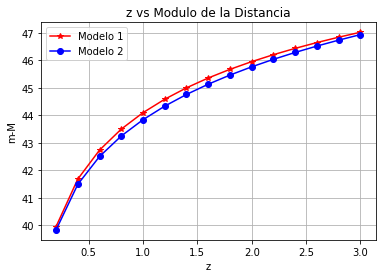

In [6]:
#graficas m-M

plt.plot(z1,module1,marker='*',label='Modelo 1',c='r')
plt.plot(z2,module2,marker='o',label='Modelo 2',c='b')
plt.title('z vs Modulo de la Distancia')
plt.xlabel('z')
plt.ylabel('m-M')
plt.legend()
plt.grid()
